# Imports, Frameworks, and Tools

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import kagglehub
import os
import datetime
import time

# Tweets about the Top Companies from 2015 to 2020 Dataset

In [ ]:
# Download the Tweets about the Top Companise from 2015 to 2020 Dataset
# Straight from Kaggle

# Download latest version
path_tweetData = kagglehub.dataset_download("omermetinn/tweets-about-the-top-companies-from-2015-to-2020")

print("Path to dataset files:", path_tweetData)

Using Colab cache for faster access to the 'tweets-about-the-top-companies-from-2015-to-2020' dataset.
Path to dataset files: /kaggle/input/tweets-about-the-top-companies-from-2015-to-2020


In [ ]:
# Print out the files contained in this dataset

print(os.listdir(path_tweetData))

['Company_Tweet.csv', 'Tweet.csv', 'Company.csv']


# Putting the files into dataframes

In [ ]:
company_tweets = pd.read_csv(os.path.join(path_tweetData, "Company_Tweet.csv"))
print("Comapny Tweets Dataframe:")
print(company_tweets.head())

Comapny Tweets Dataframe:
             tweet_id ticker_symbol
0  550803612197457920          AAPL
1  550803610825928706          AAPL
2  550803225113157632          AAPL
3  550802957370159104          AAPL
4  550802855129382912          AAPL


In [ ]:
tweets = pd.read_csv(os.path.join(path_tweetData, "Tweet.csv"))
print("Tweets Dataframe:")
print(tweets.head())

Tweets Dataframe:
             tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num  
0            0         1  
1            0         0  
2            0         0  
3            0         1  
4            0         1  


In [ ]:
company = pd.read_csv(os.path.join(path_tweetData, "Company.csv"))
print("Company Dataframe:")
print(company.head())

Company Dataframe:
  ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc


# Values of Top NASDAQ Companies from 2010 to 2020

In [ ]:
# Import the other dataset

# Download latest version
path_companyData = kagglehub.dataset_download("omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020")

print("Path to dataset files:", path_companyData)

Using Colab cache for faster access to the 'values-of-top-nasdaq-copanies-from-2010-to-2020' dataset.
Path to dataset files: /kaggle/input/values-of-top-nasdaq-copanies-from-2010-to-2020


In [ ]:
# Print out the files contained in this dataset

print(os.listdir(path_companyData))

['CompanyValues.csv', 'Company.csv']


# Again, Putting these files into dataframes

In [ ]:
company_values = pd.read_csv(os.path.join(path_companyData, "CompanyValues.csv"))
print("Company Values Dataframe:")
print(company_values.head())

Company Values Dataframe:
  ticker_symbol    day_date  close_value    volume  open_value  high_value  \
0          AAPL  2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL  2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL  2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL  2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL  2020-05-22       318.89  20450750      315.77      319.23   

   low_value  
0     316.47  
1     315.63  
2     313.09  
3     316.50  
4     315.35  


In [ ]:
company_1 = pd.read_csv(os.path.join(path_companyData, "Company.csv"))
print("Company Dataframe:")
print(company_1.head())

Company Dataframe:
  ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc


# Merging the datasets into one

Below I merged 'tweets' and 'company_tweets' into one dataset called 'tweets_with_tickers' (joining them on the tweet_id's provided)

In [ ]:
tweets_with_tickers = pd.merge(tweets, company_tweets, on = 'tweet_id')
tweets_with_tickers.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [ ]:
# Before I can merge the price data to the above based on the dates I need to see if the formats are the same

print(tweets_with_tickers['post_date'].head())
print(company_values['day_date'].head())

0    1420070457
1    1420070496
2    1420070510
3    1420070807
4    1420071005
Name: post_date, dtype: int64
0    2020-05-29
1    2020-05-28
2    2020-05-27
3    2020-05-26
4    2020-05-22
Name: day_date, dtype: object


The above is obviously not the same data type so we have to convert one or the other to match.

In [ ]:
# This will covnert the Unix timestamps to datetime
tweets_with_tickers['post_date'] = pd.to_datetime(tweets_with_tickers['post_date'], unit = 's')

# And this will convert the strings used in the company_values to datetime
company_values['day_date'] = pd.to_datetime(company_values['day_date'])

# Then we check the outputs
print(tweets_with_tickers['post_date'].head())
print(company_values['day_date'].head())

0   2015-01-01 00:00:57
1   2015-01-01 00:01:36
2   2015-01-01 00:01:50
3   2015-01-01 00:06:47
4   2015-01-01 00:10:05
Name: post_date, dtype: datetime64[ns]
0   2020-05-29
1   2020-05-28
2   2020-05-27
3   2020-05-26
4   2020-05-22
Name: day_date, dtype: datetime64[ns]


In [ ]:
# In the above we can see the tweets have time values as well as dates so we will have to strip those out
tweets_with_tickers['date'] = tweets_with_tickers['post_date'].dt.date
tweets_with_tickers['date'].head()

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01


# Removing Extraneous Colunns like 'Writer'

In [ ]:
tweets_with_tickers = tweets_with_tickers.drop('writer', axis = 1)
print(tweets_with_tickers.head())

             tweet_id           post_date  \
0  550441509175443456 2015-01-01 00:00:57   
1  550441672312512512 2015-01-01 00:01:36   
2  550441732014223360 2015-01-01 00:01:50   
3  550442977802207232 2015-01-01 00:06:47   
4  550443807834402816 2015-01-01 00:10:05   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num ticker_symbol        date  
0            0         1          AAPL  2015-01-01  
1            0         0          AAPL  2015-01-01  
2            0         0          AMZN  2015-01-01  
3            0         1          TSLA  2015-01-01  
4            0         1          AAPL  2015-01-0

In [ ]:
# Looking at the above, I think we need to drop the comment, retweet and like data as well
tweets_with_tickers = tweets_with_tickers.drop(['comment_num', 'retweet_num', 'like_num'], axis = 1)
print(tweets_with_tickers.head())

             tweet_id           post_date  \
0  550441509175443456 2015-01-01 00:00:57   
1  550441672312512512 2015-01-01 00:01:36   
2  550441732014223360 2015-01-01 00:01:50   
3  550442977802207232 2015-01-01 00:06:47   
4  550443807834402816 2015-01-01 00:10:05   

                                                body ticker_symbol        date  
0  lx21 made $10,008  on $AAPL -Check it out! htt...          AAPL  2015-01-01  
1  Insanity of today weirdo massive selling. $aap...          AAPL  2015-01-01  
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...          AMZN  2015-01-01  
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...          TSLA  2015-01-01  
4  Swing Trading: Up To 8.91% Return In 14 Days h...          AAPL  2015-01-01  


# Dataset Alignment
We can see from the titles of the datasets that one covers 2010 to 2020 and the other covers 2015 to 2020. Below we verify this and trip the excess rows of the dataset that covers years not included in the other dataset

In [ ]:
# Now that we know the stock data needs to be trimmed before we merge we can take action
# Note I had to make a copy because I kept having issues later on merging the datasets and the
# dtypes not matching
company_values_trimmed = company_values[
    (company_values['day_date'] >= '2015-01-01') &
    (company_values['day_date'] <= '2019-12-31')
].copy()

# Now converting the date dtype
company_values_trimmed['day_date'] = pd.to_datetime(company_values_trimmed['day_date']).dt.date

# And then we check the results again
print(f"Earliest Data in Tweets: {tweets_with_tickers['date'].min()}")
print(f"Latest Data in Tweets: {tweets_with_tickers['date'].max()}")


Earliest Data in Tweets: 2015-01-01
Latest Data in Tweets: 2019-12-31


Glad I checked! The Twitter data actually goes to 31 December 2019, while the company value data goes to 29 May 2020. I expected the start dates not to match, but not so much the end dates.

# Merging the datasets into a final dataset

Here we merge tweets_with_tickers and company_values, putting all of the tweets, ticker prices and dates into one unified dataset.

In [ ]:
# Merge tweets with stock prices
finished_dataset = pd.merge(
    tweets_with_tickers,
    company_values_trimmed,
    left_on=['date', 'ticker_symbol'],
    right_on=['day_date', 'ticker_symbol'],
    how='inner'
)

# Here we do a final verification that the merge worked and have a look at it
print("Merged dataset shape:", finished_dataset.shape)
print("\nFirst few rows:")
print(finished_dataset.head())
print("\nColumns:", list(finished_dataset.columns))
print(finished_dataset.info())

Merged dataset shape: (4336445, 11)

First few rows:
             tweet_id           post_date  \
0  550441509175443456 2015-01-01 00:00:57   
1  550441672312512512 2015-01-01 00:01:36   
2  550441732014223360 2015-01-01 00:01:50   
3  550442977802207232 2015-01-01 00:06:47   
4  550443807834402816 2015-01-01 00:10:05   

                                                body ticker_symbol  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...          AAPL   
1  Insanity of today weirdo massive selling. $aap...          AAPL   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...          AMZN   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...          TSLA   
4  Swing Trading: Up To 8.91% Return In 14 Days h...          AAPL   

         date    day_date  close_value    volume  open_value  high_value  \
0  2015-01-01  2015-01-01       110.38  41304780      112.82      113.13   
1  2015-01-01  2015-01-01       110.38  41304780      112.82      113.13   
2  2015-01-01  2015-01-01  

# Initial Data visualization to see the data graphically

In [ ]:
# # Setting style settings

sns.dark_palette('skyblue', n_colors=6, reverse=False, as_cmap=False, input='rgb')
# sns.dark_palette("#79C")
# # plt.style.use('dark_background')
# plt.rcParams['figure.figsize'] = (14, 6)

[(np.float64(0.14015538617325235),
  np.float64(0.14923525225953582),
  np.float64(0.15414013001355295)),
 (np.float64(0.21800666187977835),
  np.float64(0.2809568292586091),
  np.float64(0.30762582950103845)),
 (np.float64(0.29585793758630435),
  np.float64(0.4126784062576823),
  np.float64(0.4611115289885239)),
 (np.float64(0.37370921329283036),
  np.float64(0.5443999832567554),
  np.float64(0.6145972284760094)),
 (np.float64(0.45156048899935636),
  np.float64(0.6761215602558288),
  np.float64(0.7680829279634949)),
 (np.float64(0.5294117647058824),
  np.float64(0.807843137254902),
  np.float64(0.9215686274509803))]

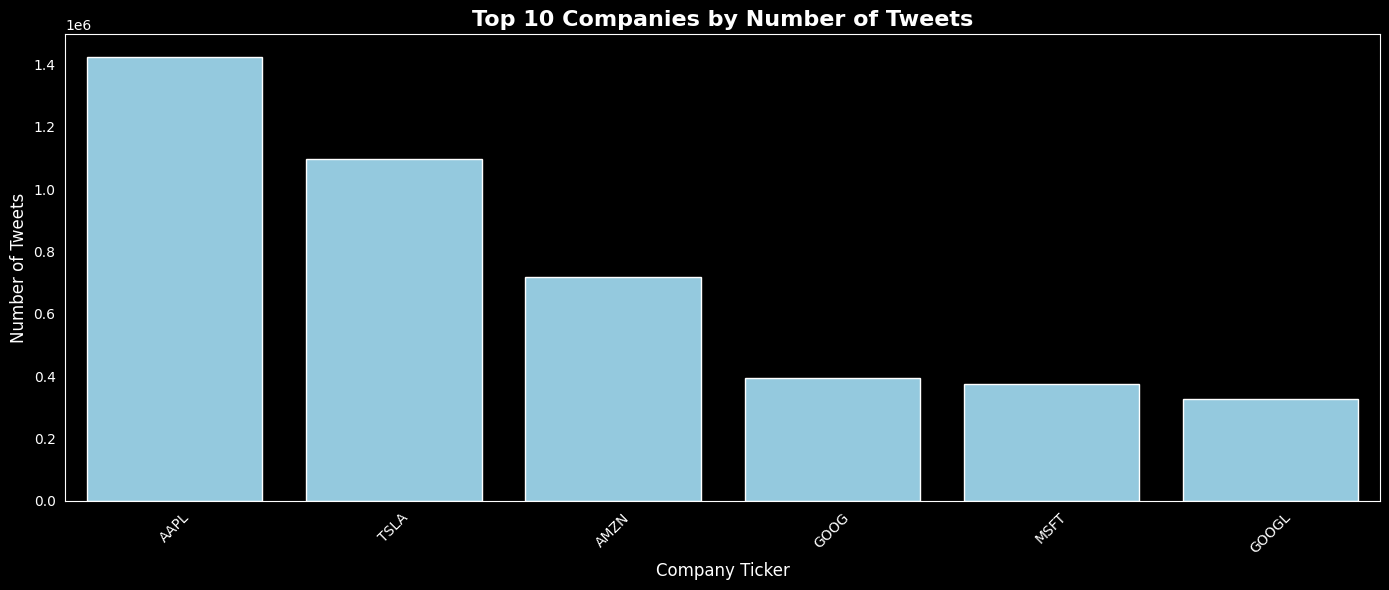

In [ ]:
# Distribution of tweets per company

plt.figure(figsize=(14, 6))
tweet_counts = finished_dataset['ticker_symbol'].value_counts().head(10)
sns.barplot(x=tweet_counts.index, y=tweet_counts.values, color='skyblue')
plt.title('Top 10 Companies by Number of Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Company Ticker', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

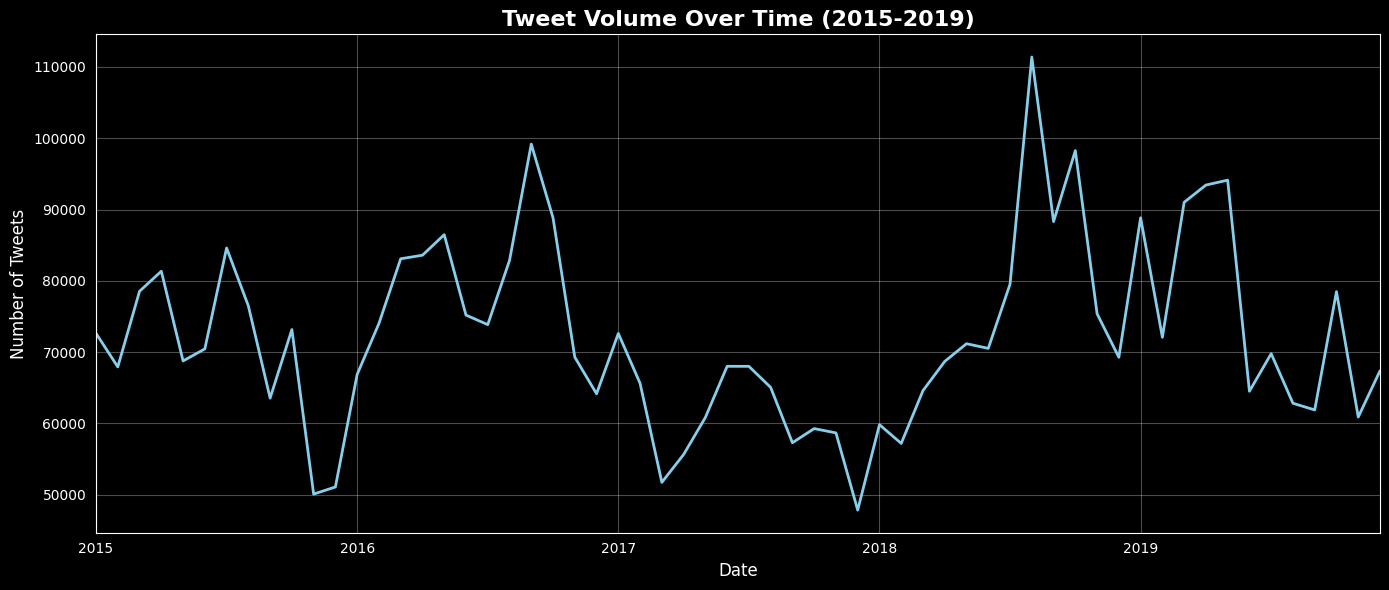

In [ ]:
# Tweet volume over time


plt.figure(figsize=(14, 6))
finished_dataset['date'] = pd.to_datetime(finished_dataset['date'])
tweets_per_month = finished_dataset.groupby(finished_dataset['date'].dt.to_period('M')).size()
tweets_per_month.plot(kind='line', color='skyblue', linewidth=2)
plt.title('Tweet Volume Over Time (2015-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

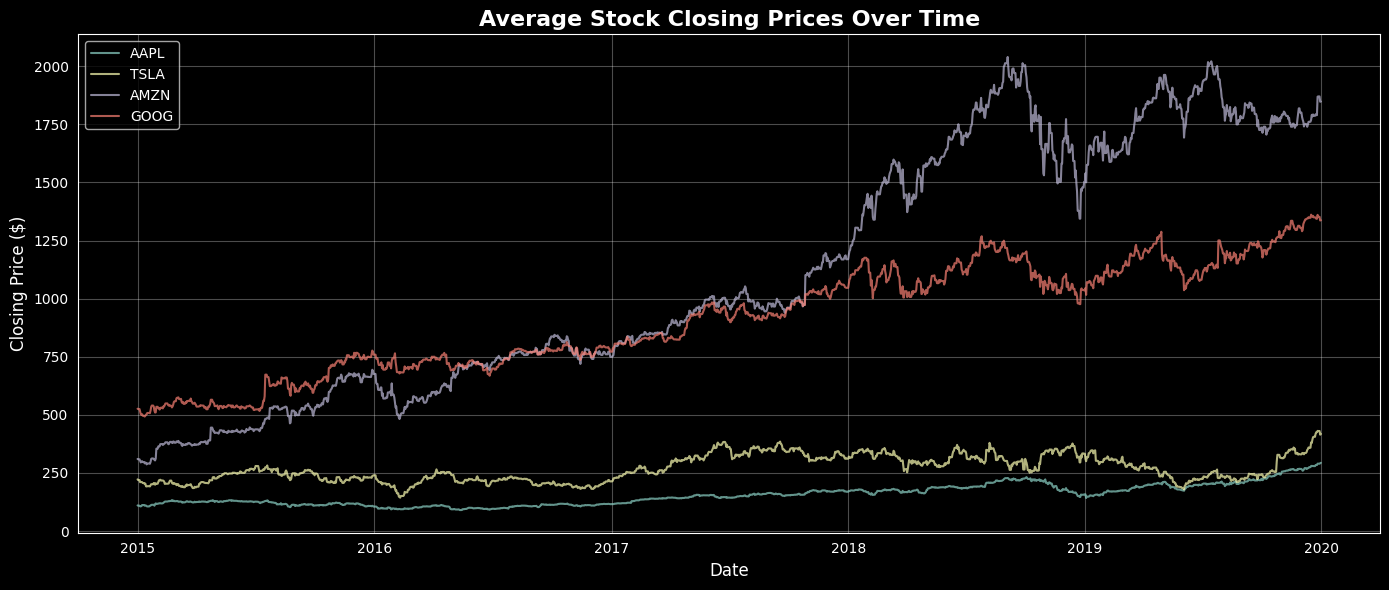

In [ ]:
# An average of closing prices over time


plt.figure(figsize=(14, 6))
top_companies = finished_dataset['ticker_symbol'].value_counts().head(4).index # Top four to match the last visualization
for company in top_companies:
    company_data = finished_dataset[finished_dataset['ticker_symbol'] == company]
    plt.plot(company_data.groupby('date')['close_value'].mean(), label=company, alpha=0.7)
plt.title('Average Stock Closing Prices Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

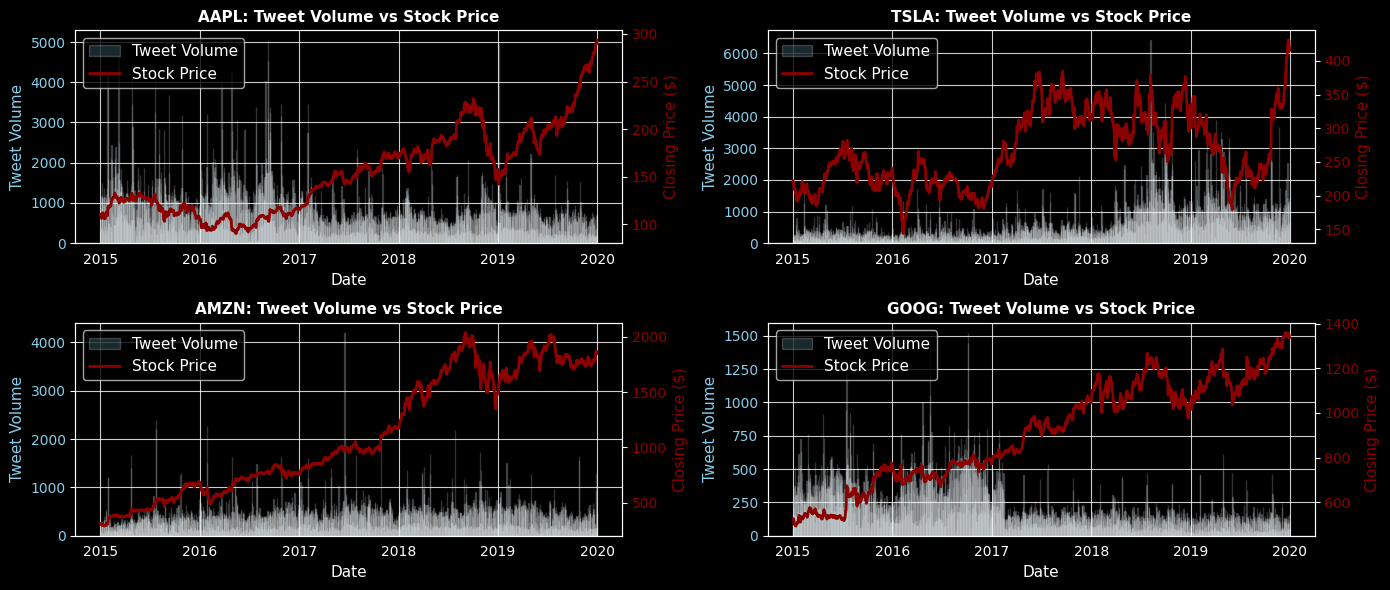

In [ ]:
# Average stock prices at closing overlaid ontop of tweet volume
# I'm looking for correlation between tweet volume and stock price swings

sns.set_style("dark")
plt.style.use("dark_background")

fig, axes = plt.subplots(2, 2, figsize=(14, 6))
axes = axes.flatten()

# Get top 4 companies by tweet volume
top_companies = finished_dataset['ticker_symbol'].value_counts().head(4).index

for idx, company in enumerate(top_companies):
    ax1 = axes[idx]

    # Filter the data for each company
    company_data = finished_dataset[finished_dataset['ticker_symbol'] == company].copy()

    # Group by date for tweet volume and average stock price
    daily_data = company_data.groupby('date').agg({
        'tweet_id': 'count',  # Count the tweets
        'close_value': 'mean'  # Average the closing price
    }).reset_index()

    # Create the dual axis since we are overlaying two graphs
    ax2 = ax1.twinx()

    # Plot tweet volume as bars
    ax1.bar(daily_data['date'], daily_data['tweet_id'], alpha=0.2, color='skyblue', label='Tweet Volume')
    ax1.set_ylabel('Tweet Volume', fontsize=11, color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    # Plot stock price as line
    ax2.plot(daily_data['date'], daily_data['close_value'], color='darkred', linewidth=2, label='Stock Price')
    ax2.set_ylabel('Closing Price ($)', fontsize=11, color='darkred')
    ax2.tick_params(axis='y', labelcolor='darkred')

    # Formatting
    ax1.set_xlabel('Date', fontsize=11)
    ax1.set_title(f'{company}: Tweet Volume vs Stock Price', fontsize=11, fontweight='bold')
    ax1.grid(alpha=0.8)

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()